In [1]:
'''
Clustering: K-Means 
Dataset : Social_Network_Ads.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
Apply K-Means clustering algorithms (based on EstimatedSalary column) to find the group of users. 
'''

'\nClustering: K-Means \nDataset : Social_Network_Ads.csv \nApply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply K-Means clustering algorithms (based on EstimatedSalary column) to find the group of users. \n'

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'LP-1_Dataset\K-Means & Hirarchical Clustering\Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
X = data[['EstimatedSalary']]

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

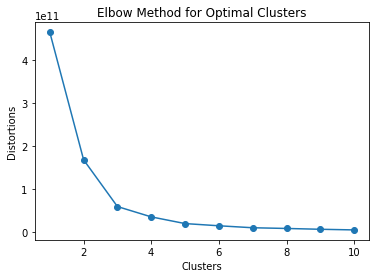

In [8]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit_predict(X)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Clusters')
plt.ylabel('Distortions')
plt.show()

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

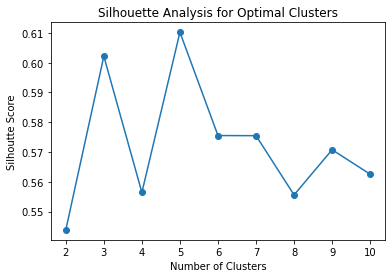

In [11]:
range_n_clusters = range(2, 11)
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

print(data[['EstimatedSalary', 'Cluster']])

     EstimatedSalary  Cluster
0              19000        2
1              20000        2
2              43000        4
3              57000        4
4              76000        1
..               ...      ...
395            41000        4
396            23000        2
397            20000        2
398            33000        2
399            36000        2

[400 rows x 2 columns]


C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [21]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Cluster
0,15624510,Male,19,19000,0,2
1,15810944,Male,35,20000,0,2
2,15668575,Female,26,43000,0,4
3,15603246,Female,27,57000,0,4
4,15804002,Male,19,76000,0,1


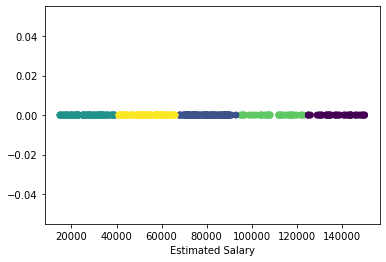

In [13]:
plt.scatter(data['EstimatedSalary'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.xlabel('Estimated Salary')
plt.show()

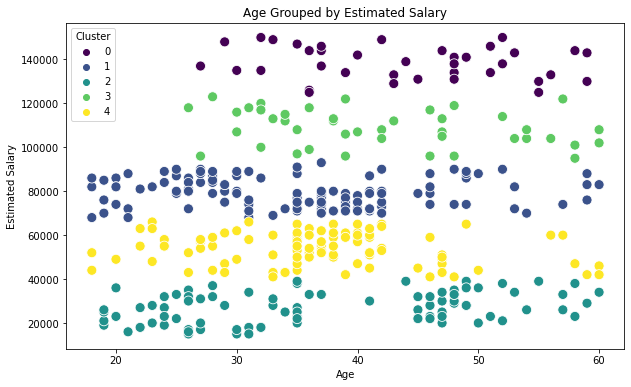

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['EstimatedSalary'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Age Grouped by Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

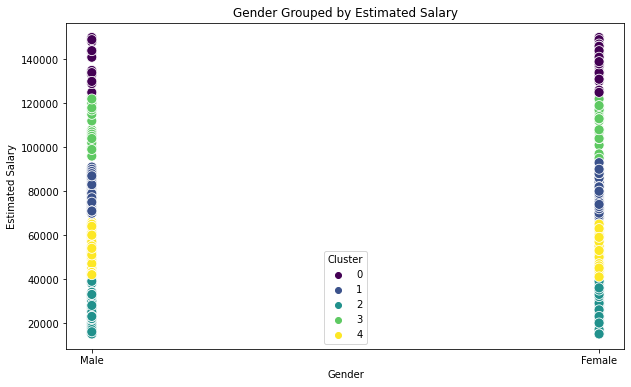

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Gender'], y=data['EstimatedSalary'], hue=data['Cluster'], palette='viridis', s=100)
plt.title("Gender Grouped by Estimated Salary")
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

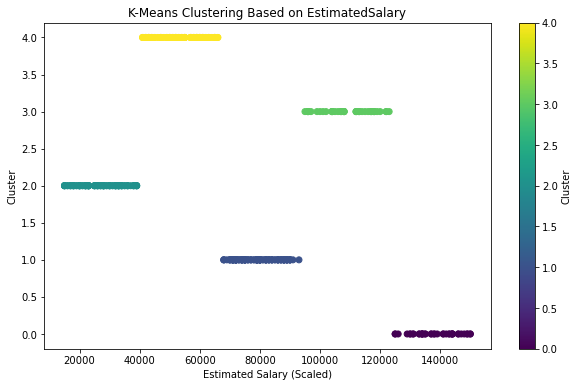

In [22]:
# Scatter plot to visualize the clusters based on EstimatedSalary
plt.figure(figsize=(10, 6))
plt.scatter(data['EstimatedSalary'], data['Cluster'], c=data['Cluster'], cmap='viridis')
plt.title("K-Means Clustering Based on EstimatedSalary")
plt.xlabel("Estimated Salary (Scaled)")
plt.ylabel("Cluster")
plt.colorbar(label="Cluster")
plt.show()
